In [2]:
"""Evaluate a trained spectrogram classifier on a single PNG input."""

from __future__ import annotations

from pathlib import Path

from PIL import Image
import torch
import matplotlib.pyplot as plt

from conv2d_model import DEFAULT_IMAGE_SIZE, build_base_transform, load_weights

In [3]:
def load_image_tensor(image_path: Path, transform, device: torch.device) -> torch.Tensor:
	image = Image.open(image_path).convert("L")
	tensor = transform(image).unsqueeze(0)
	return tensor.to(device)

device = torch.device("mps")

In [4]:
CLASS_NAMES = ["WASHER", "SPIN", "IDLE", "END", "FAN", "DRYER"]

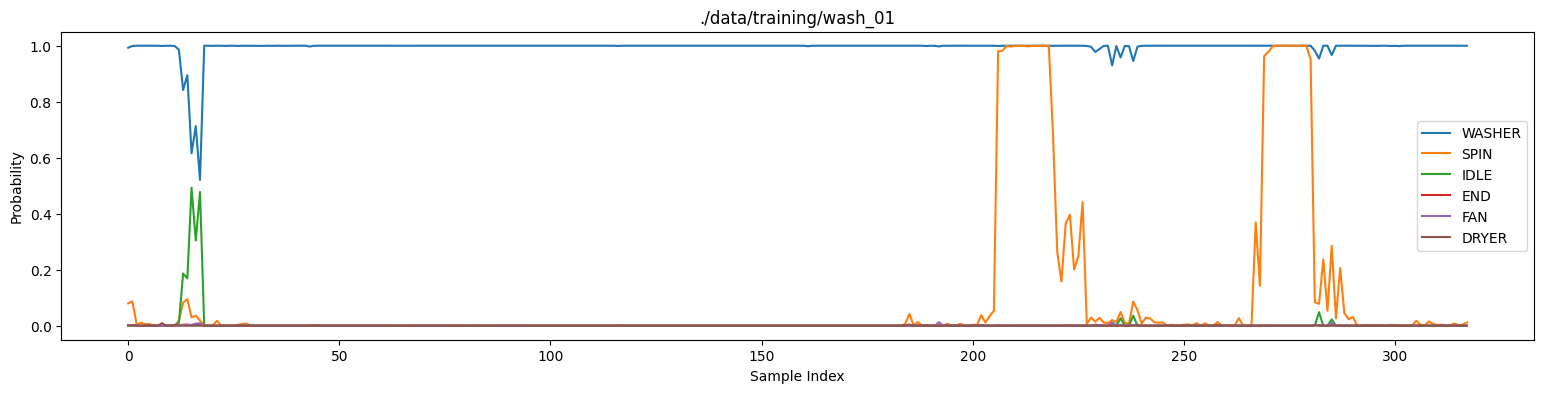

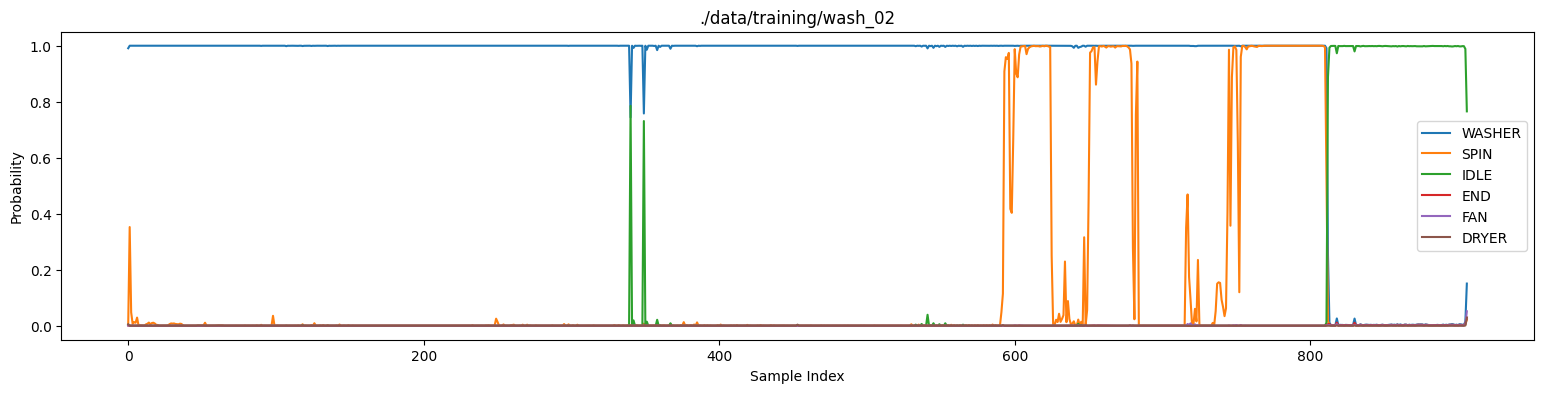

KeyboardInterrupt: 

In [8]:
model_path = Path("./conv2d_model.pt")

def evaluateSpectrums(path):
    png_files = list(Path(path).glob("**/*.png"))
    all_probs = []

    transform = build_base_transform(DEFAULT_IMAGE_SIZE)
    model, classes = load_weights(model_path, device)
    model.eval()

    png_files.sort(key=lambda x: int(x.stem.split('_')[-1]))

    for png_file in png_files:
        tensor = load_image_tensor(png_file, transform, device)
        with torch.no_grad():
            logits = model(tensor)
            probs = torch.sigmoid(logits).squeeze(0).cpu().numpy()
        all_probs.append(probs)

    all_probs = torch.tensor(all_probs)


    plt.figure(figsize=(19,4))

    for i, class_name in enumerate(CLASS_NAMES):
        plt.plot(all_probs[:, i].cpu().numpy(), label=class_name)


    plt.xlabel("Sample Index")
    plt.ylabel("Probability")
    plt.title(path)
    plt.legend()
    plt.show()


evaluateSpectrums("./data/training/wash_01")
evaluateSpectrums("./data/training/wash_02")
evaluateSpectrums("./data/training/wash_03")
evaluateSpectrums("./data/training/end_01")
evaluateSpectrums("./data/training/dryer_01")
evaluateSpectrums("./data/training/dryer_02")
evaluateSpectrums("./data/training/idle_01")
evaluateSpectrums("./data/training/washer_dryer_01")




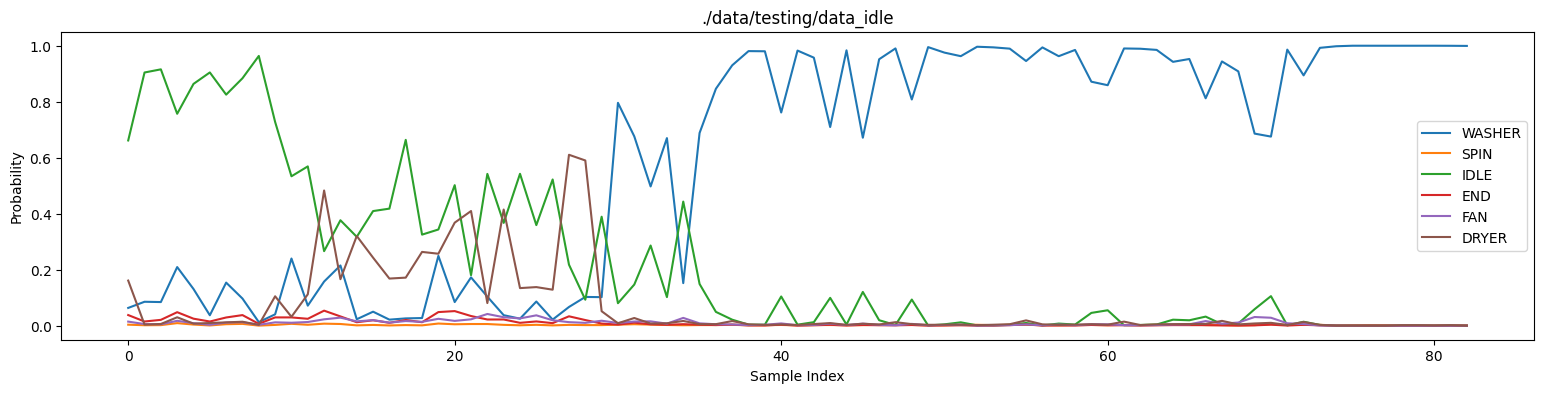

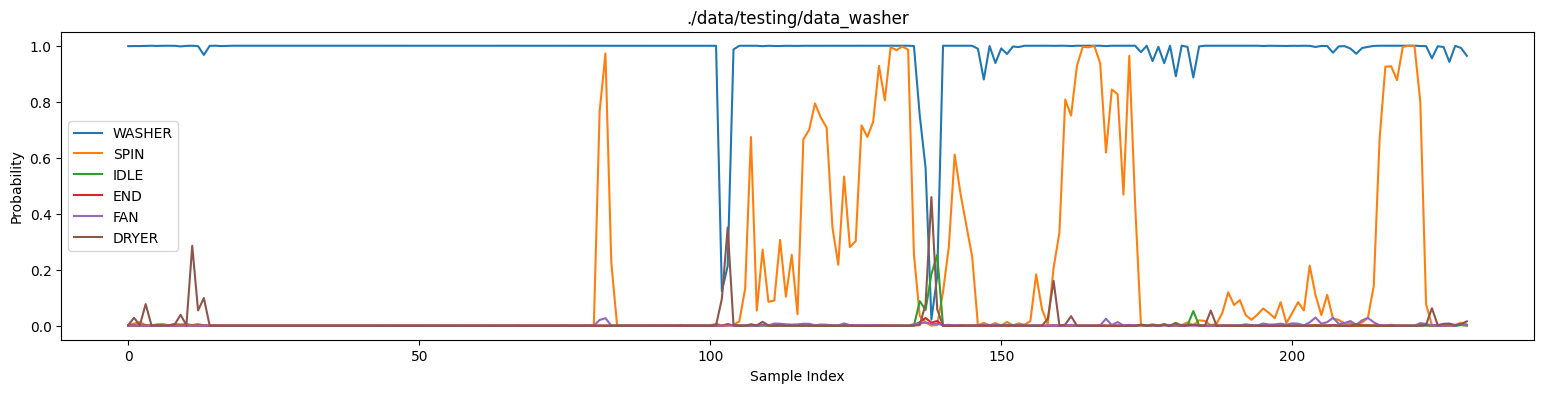

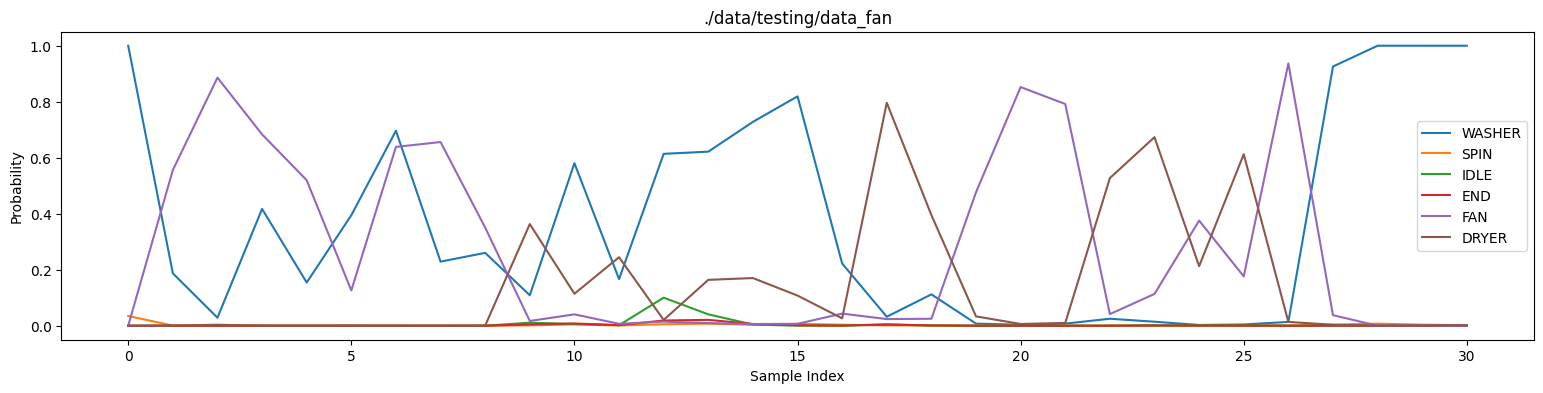

In [9]:
# Datasets without annotations, only used for testing
evaluateSpectrums("./data/testing/data_idle")
evaluateSpectrums("./data/testing/data_washer")
evaluateSpectrums("./data/testing/data_fan")